# Pneumonia Detection Using XRay Images

Pneumonia is one of the serious disease that can infects one or both lungs because of
bacterium, virus, and some fungi. Each year, pneumonia affects approximately 450 million
people worldwide. Due to lack of experts/doctors, this disease is difficult to detect. Because of
that, our team wants to create a project that can help the experts and the doctors to get the
result very quickly using Deep Learning, from uploading the XRay to the computer then the
result will come out. The result will help the experts/doctors to determine which the best actions
will do to the patient.

# Mount Dataset to GDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setting Up 

In [21]:
import os, os.path
import fnmatch
import pathlib

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load & Customize the Dataset Using ImageDataGenerator

In [23]:
train_dir = '/content/drive/MyDrive/Capstone Project/chest_xray/chest_xray/train'
val_dir = '/content/drive/MyDrive/Capstone Project/chest_xray/chest_xray/val/'
test_dir = '/content/drive/MyDrive/Capstone Project/chest_xray/chest_xray/test'

classes = ['PNEUMONIA','NORMAL']

Counting on how much is the normal chest XRays and the pneumonia chest XRays we have in the Dataset that we have been load.

In [24]:
path, dirs, normal_lungs = next(os.walk('/content/drive/MyDrive/Capstone Project/chest_xray/chest_xray/train/NORMAL'))
normal_lungs_count = len(normal_lungs)
print('Normal Chest XRays in the training dataset: ' + str(normal_lungs_count) + ' images')

path, dirs, damaged_lungs = next(os.walk('/content/drive/MyDrive/Capstone Project/chest_xray/chest_xray/train/PNEUMONIA'))
damaged_lungs_count = len(damaged_lungs)
print('Pneumonia Chest XRays in the training dataset: ' + str(damaged_lungs_count) + ' images')

Normal Chest XRays in the training dataset: 1342 images
Pneumonia Chest XRays in the training dataset: 3876 images


In [25]:
batch_size = 256
img_size = 224

In [26]:
train_generator=ImageDataGenerator(rescale=1./255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images 
        vertical_flip=False)

In [27]:
val_generator=ImageDataGenerator(rescale=1/255)

In [28]:
test_generator=ImageDataGenerator(rescale=1/255)

# Creating the Data Flow

In [29]:
training_generator=train_generator.flow_from_directory(train_dir,
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    color_mode='grayscale')

Found 5216 images belonging to 2 classes.


In [30]:
val_generator=val_generator.flow_from_directory(val_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  color_mode='grayscale') 

Found 16 images belonging to 2 classes.


In [31]:
test_generator=test_generator.flow_from_directory(test_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  color_mode='grayscale') 

Found 624 images belonging to 2 classes.


# Convolutional Neural Network

In [32]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(img_size,img_size,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'), 
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

# Implemented the Adam Optimizer

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [34]:
train_size = len(training_generator.filenames)
test_size = len(test_generator.filenames)
train_size, test_size

(5216, 624)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)       

# Training the Dataset

In [36]:
history = model.fit_generator(generator = training_generator,
            validation_data = test_generator,
            steps_per_epoch = train_size/batch_size, 
            validation_steps = test_size/batch_size,
            epochs = 15,
            verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
20/20 [==============================] - 369s 18s/step - loss: 0.6014 - acc: 0.7176 - val_loss: 0.6943 - val_acc: 0.6250
Epoch 2/15
20/20 [==============================] - 364s 18s/step - loss: 0.5794 - acc: 0.7429 - val_loss: 0.6947 - val_acc: 0.6250
Epoch 3/15
20/20 [==============================] - 357s 17s/step - loss: 0.4320 - acc: 0.7860 - val_loss: 0.7900 - val_acc: 0.6394
Epoch 4/15
20/20 [==============================] - 373s 18s/step - loss: 0.4151 - acc: 0.8186 - val_loss: 0.3854 - val_acc: 0.8349
Epoch 5/15
20/20 [==============================] - 356s 17s/step - loss: 0.3305 - acc: 0.8602 - val_loss: 0.3928 - val_acc: 0.8141
Epoch 6/15
20/20 [==============================] - 366s 18s/step - loss: 0.2763 - acc: 0.8854 - val_loss: 0.4464 - val_acc: 0.7965
Epoch 7/15
20/20 [==============================] - 366s 18s/step - loss: 0.3191 - acc: 0.8556 - val_loss: 0.3426 - val_acc: 0.8606
Epoch 8/15
20/20 [==============================] - 365s 18s/step - loss: 0.

<Figure size 432x288 with 0 Axes>

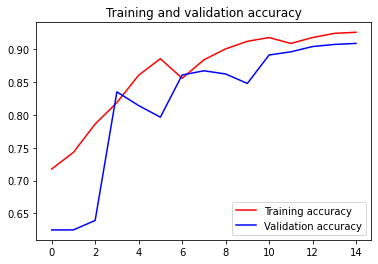

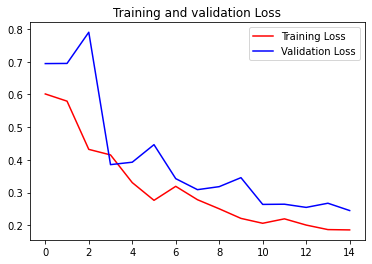

<Figure size 432x288 with 0 Axes>

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

#Accuracy & Loss Percentage

In [38]:
print("Loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

3/3 [==============================] - 16s 3s/step - loss: 0.2451 - acc: 0.9087
Loss of the model is -  24.50840473175049 %
3/3 [==============================] - 14s 3s/step - loss: 0.2451 - acc: 0.9087
Accuracy of the model is -  90.86538553237915 %


#Save The Model

In [39]:
model.save("/content/drive/MyDrive/Capstone Project/Model Saved/model-gcp3.h5")
print("Saved model to gdrive")

Saved model to gdrive


In [40]:
model.save_weights("/content/drive/MyDrive/Capstone Project/Model Saved/model.h5")
print("Saved model to gdrive")

Saved model to gdrive


#Convert The Model To TFLite

In [ ]:
#converting
saved_model_dir = '/content/drive/MyDrive/Capstone Project/Model Saved/'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project/Model Saved/assets


In [ ]:
#saved the tflite model to gdrive
tflite_model_file = pathlib.Path("/content/drive/MyDrive/Capstone Project/Model Saved/model.tflite")
tflite_model_file.write_bytes(tflite_model)

1154388

In [ ]:
files.download(tflite_model_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>